In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from collections import defaultdict

params = {
    "font.size": 11,
    "font.family": "serif",
}
plt.rcParams.update(params)

In [2]:
dir_path = "/workspaces/gorillatracker/data/supervised/bristol/cross_encounter_validation/cropped_frames_filtered"

images = os.listdir(dir_path)


def get_label(image):
    return image.split("_")[0]


def get_video(image):
    return image.split("_")[2]

Text(0.5, 1.0, 'Number of images per video')

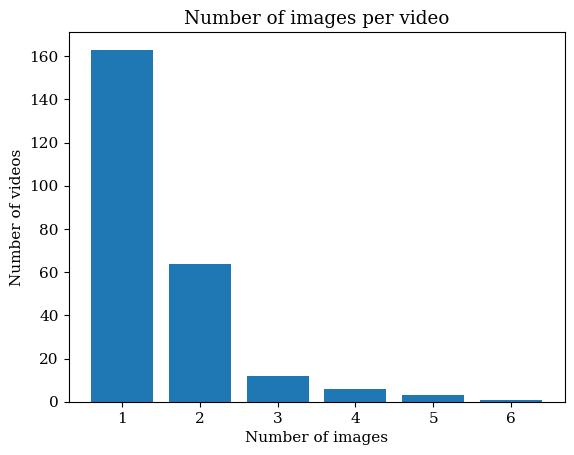

In [3]:
# plot the number of images per video
video_images = {}
for image in images:
    video = get_video(image)
    if video in video_images:
        video_images[video] += 1
    else:
        video_images[video] = 1

image_count2videos = defaultdict(list)
for video, count in video_images.items():
    image_count2videos[count] += [video]

plt.bar(image_count2videos.keys(), [len(videos) for videos in image_count2videos.values()])
plt.xlabel("Number of images")
plt.ylabel("Number of videos")
plt.title("Number of images per video")

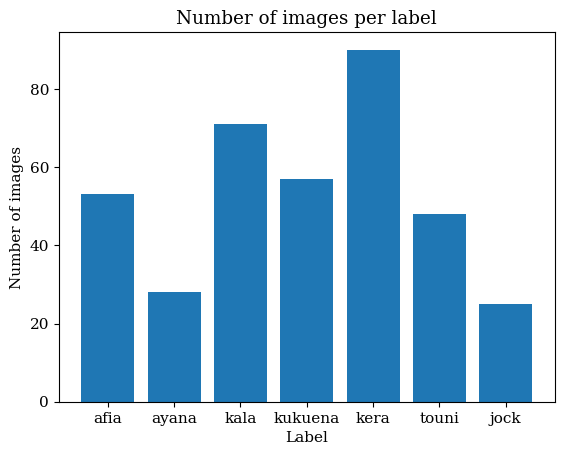

In [4]:
# get images per label
label_images = {}
for image in images:
    label = get_label(image)
    if label in label_images:
        label_images[label] += 1
    else:
        label_images[label] = 1

plt.figure()
plt.bar(label_images.keys(), label_images.values())
plt.xlabel("Label")
plt.ylabel("Number of images")
plt.title("Number of images per label")
plt.show()

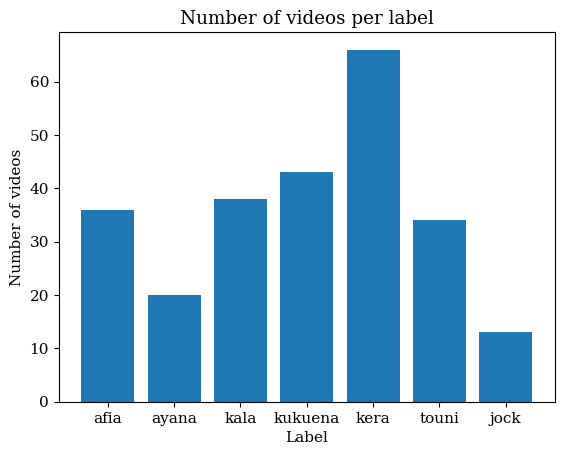

In [5]:
# videos per label
label_videos = defaultdict(set)
for image in images:
    label = get_label(image)
    video = get_video(image)
    label_videos[label].add(video)

plt.figure()
plt.bar(label_videos.keys(), [len(videos) for videos in label_videos.values()])
plt.xlabel("Label")
plt.ylabel("Number of videos")
plt.title("Number of videos per label")
plt.show()

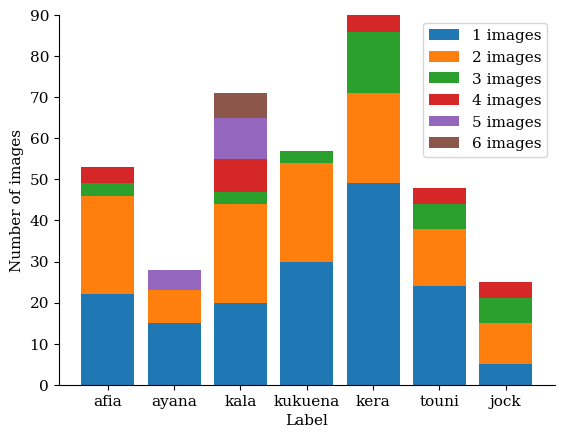

In [10]:
# combine into barplot of number of images per label where each bar is a stack of images that are from videos with one image, two images, etc.

label_videos_imgcount = defaultdict(lambda: defaultdict(int))
for image in images:
    label = get_label(image)
    video = get_video(image)
    label_videos_imgcount[label][video] += 1

# get the maximum number of images per video
max_images = max([max(videos.values()) for videos in label_videos_imgcount.values()])
plt.figure()
bottom = [0] * len(label_videos_imgcount.keys())
labels = list(label_videos_imgcount.keys())
for i in range(1, max_images + 1):
    label_images = {label: 0 for label in labels}
    for label, videos in label_videos_imgcount.items():
        for video, count in videos.items():
            if count == i:
                label_images[label] += i

    plt.bar(label_images.keys(), label_images.values(), bottom=bottom)
    bottom = [bottom[j] + label_images[label] for j, label in enumerate(label_images.keys())]
plt.xlabel("Label")
plt.ylabel("Number of images")
plt.legend([f"{i} images" for i in range(1, max_images + 1)])

# remove right and top borders
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)


plt.savefig("plots/bristol/images_per_label_with_video_count.pdf", bbox_inches="tight")

plt.show()

In [7]:
from PIL import Image

img_sizes = []
for image in images:
    img = Image.open(os.path.join(dir_path, image))
    img_sizes.append(img.size)

len(img_sizes)

372

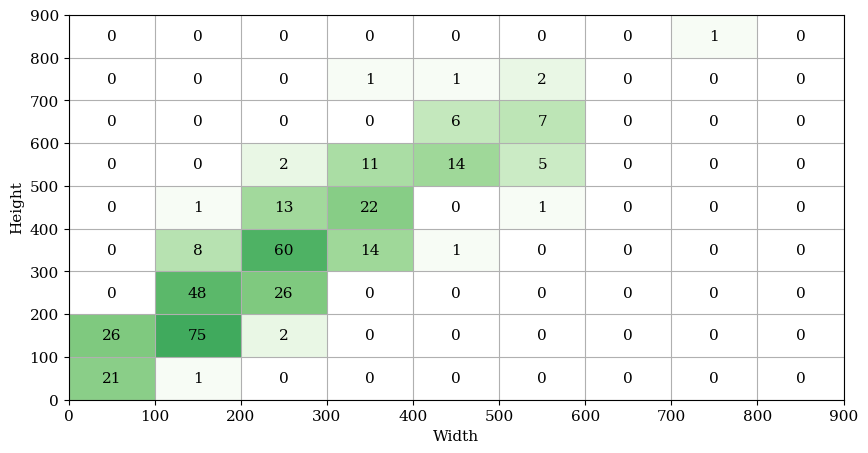

In [11]:
# make a matrix histogram of the image sizes (width x height)
from matplotlib.colors import LogNorm

plt.figure(figsize=(10, 5))
amounts_x, amounts_y = [x[0] for x in img_sizes], [x[1] for x in img_sizes]
norm = LogNorm(vmax=1000)
plt.hist2d(amounts_x, amounts_y, bins=range(0, 1000, 100), cmap="Greens", norm=norm)
for i in range(0, 900, 100):
    for j in range(0, 900, 100):
        plt.text(
            i + 50,
            j + 50,
            f"{len([1 for x in img_sizes if i <= x[0] < i+100 and j <= x[1] < j+100])}",
            color="black",
            ha="center",
            va="center",
        )
plt.xlabel("Width")
plt.ylabel("Height")
# plt.title("Image Sizes")
# plt.colorbar()
plt.grid()

# plt.savefig("plots/bristol/image_sizes.pdf", bbox_inches="tight")
plt.show()

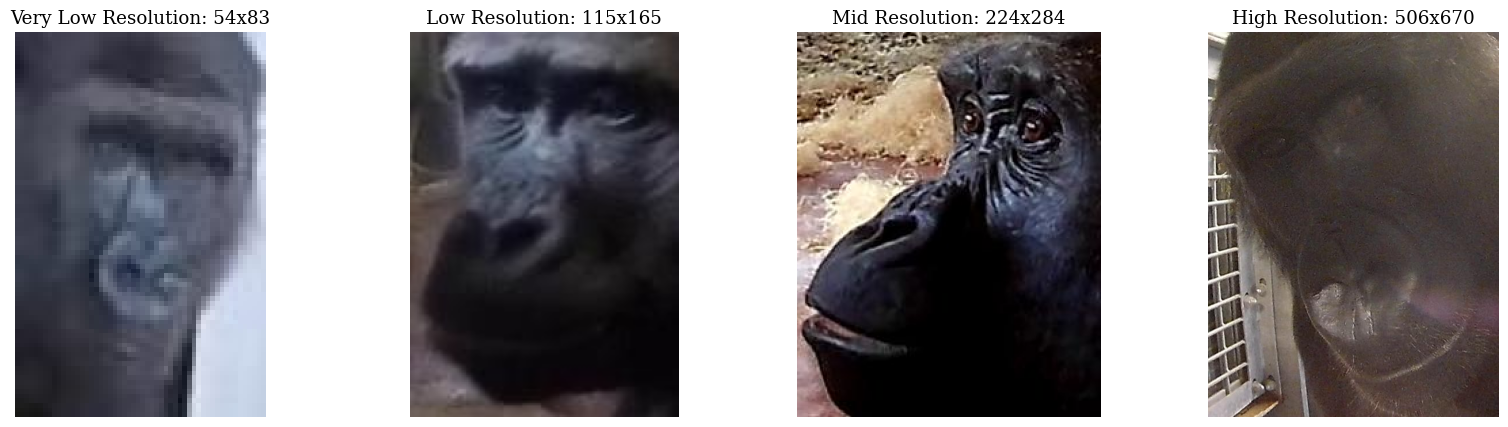

In [9]:
# plot one low mid and high resolution image
very_low_res = [x for x in img_sizes if x[0] < 100 and x[1] < 100][3]
low_res = [x for x in img_sizes if 100 <= x[0] < 200 and 100 <= x[1] < 200][2]
mid_res = [x for x in img_sizes if 200 <= x[0] < 500 and 200 <= x[1] < 500][2]
high_res = [x for x in img_sizes if x[0] > 500 and x[1] > 500][1]

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(Image.open(os.path.join(dir_path, images[img_sizes.index(very_low_res)])))
plt.title(f"Very Low Resolution: {very_low_res[0]}x{very_low_res[1]}")
plt.axis("off")
plt.subplot(1, 4, 2)
plt.imshow(Image.open(os.path.join(dir_path, images[img_sizes.index(low_res)])))
plt.title(f"Low Resolution: {low_res[0]}x{low_res[1]}")
plt.axis("off")
plt.subplot(1, 4, 3)
plt.imshow(Image.open(os.path.join(dir_path, images[img_sizes.index(mid_res)])))
plt.title(f"Mid Resolution: {mid_res[0]}x{mid_res[1]}")
plt.axis("off")
plt.subplot(1, 4, 4)
plt.imshow(Image.open(os.path.join(dir_path, images[img_sizes.index(high_res)])))
plt.title(f"High Resolution: {high_res[0]}x{high_res[1]}")
plt.axis("off")

# plt.savefig("plots/bristol/resolution_samples.pdf", bbox_inches="tight")
plt.show()